### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
1. [Data Cleaning](#Data-cleaning)
2. [Data Scaling](#Data-scaling)
3. [Data Transformation](#Data-Transformation)
4. [Data Reduction](#Data-reduction)

# Data preprocessing

## Importing dataset

In [115]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
dataset_path = "C:\My\Top-up Degree\Data Science\Data Science - Assignment\Data set\Kaggle\Cardiovascular Diseases Risk Prediction Dataset\CVD_cleaned.csv"
data = pd.read_csv(dataset_path)

## Data cleaning

### Fixing any missing values

In [116]:
# Import pandas as pd
import pandas as pd

# Import display from IPython.display
from IPython.display import display

# Calculate the missing data ratio for each column as percentages
missing_data_ratio = data.isnull().mean() * 100

# Convert the Series to a DataFrame for better display
missing_data_df = pd.DataFrame({'Missing Data Ratio (%)': missing_data_ratio})

# Check if there are any missing values in the entire dataset
if missing_data_df['Missing Data Ratio (%)'].any():
    # Display the missing data ratio for each column as percentages in a scrollable DataFrame
    with pd.option_context('display.max_rows', None):
        display(missing_data_df)
else:
    # Display a message that there are no missing values
    display('No missing values found')

'No missing values found'

### Removing duplicates

In [117]:
# Count duplicates
duplicate_count = data.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 80


In [118]:
# Remove duplicate rows
data = data.drop_duplicates()

In [119]:
# Count duplicates
duplicate_count = data.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)
data.shape

Number of duplicates: 0


(308774, 19)

### Dealing with outliers (Quantile Capping for columns with outliers)

In [120]:
lower_percentile = 5
upper_percentile = 95

# Perform quantile capping on data_train_dia
lower_bound_dia = data[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(lower_percentile/100)
upper_bound_dia = data[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(upper_percentile/100)
data[['Height_(cm)', 'Weight_(kg)', 'BMI']] = data[['Height_(cm)', 'Weight_(kg)', 'BMI']].clip(lower_bound_dia, upper_bound_dia, axis=1)
data.shape

(308774, 19)

In [121]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.656062,82.985998,28.417537,5.097557,29.834290,15.109517,6.297237
std,9.800452,18.705990,5.551622,8.200434,24.877812,14.926912,8.583837
min,155.000000,54.430000,20.340000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,188.000000,122.470000,40.690000,30.000000,120.000000,128.000000,128.000000


#### Saving the cleaned Data for visualization

In [122]:
data.to_csv('cvd_data_cleaned.csv')

## Data scaling

### Using Normalization (MinMaxScaling)

<div class="alert alert-block alert-info">
<b>Note:</b> This can help improve the performance of some machine learning algorithms that operate on a linear space or use a distance metric, such as KNN, linear regression, or K-means.
</div>

In [95]:
from sklearn.preprocessing import MinMaxScaler

# Define the numerical features
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# create a new dataframe for minmax scaling
data_minmax_scaled = data.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features using the scaler
data_minmax_scaled[numerical_features] = scaler.fit_transform(data_minmax_scaled[numerical_features])

data_minmax_scaled.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,0.000000,0.000000,0.000000,Yes,0.000000,0.250000,0.125000,0.09375
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,0.303030,0.333333,0.390663,No,0.000000,0.250000,0.000000,0.03125
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,0.242424,0.500000,0.645209,No,0.133333,0.100000,0.023438,0.12500
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,0.757576,0.573339,0.412285,No,0.000000,0.250000,0.234375,0.06250
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,1.000000,0.500000,0.198034,Yes,0.000000,0.066667,0.031250,0.00000


### Using standardization

<div class="alert alert-block alert-info">
<b>Note:</b>  This can help reduce the effect of outliers and improve the performance of some machine learning algorithms that assume normality, such as SVM, logistic regression, or PCA
</div>

In [96]:
from sklearn.preprocessing import StandardScaler

# create a new dataframe for standard scaling
data_standard_scaled = data.copy()

# Define the numerical features
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features using the scaler
data_standard_scaled[numerical_features] = scaler.fit_transform(data_standard_scaled[numerical_features])

data_standard_scaled.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,-1.597486,-1.526572,-1.454989,Yes,-0.621621,0.006661,0.059656,0.664362
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,-0.577124,-0.314124,-0.022973,No,-0.621621,0.006661,-1.012235,-0.267624
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,-0.781196,0.292100,0.910089,No,-0.133842,-0.716876,-0.811255,1.130355
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,0.953421,0.558859,0.056283,No,-0.621621,0.006661,0.997561,0.198369
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,1.769711,0.292100,-0.729074,Yes,-0.621621,-0.877663,-0.744262,-0.733617


### Using Robust Scaling technique

<div class="alert alert-block alert-info">
<b>Note:</b> This can help improve the performance of some machine learning algorithms that are sensitive to outliers, such as DBSCAN, linear models with regularization, or neural networks.
</div>

In [97]:
# Import pandas and sklearn libraries
import pandas as pd
from sklearn.preprocessing import RobustScaler

# create a new dataframe for standard scaling
data_robust_scaled = data.copy()

# Define the numerical features
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Create a RobustScaler object
scaler = RobustScaler()

# Fit and transform the numerical features using the scaler
data_robust_scaled[numerical_features] = scaler.fit_transform(data_robust_scaled[numerical_features])

data_robust_scaled.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,-1.000000,-1.000368,-0.929319,Yes,-0.166667,0.000000,0.2500,1.333333
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,-0.333333,-0.166850,0.111257,No,-0.166667,0.000000,-0.7500,0.000000
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,-0.466667,0.249908,0.789267,No,0.500000,-1.000000,-0.5625,2.000000
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,0.666667,0.433297,0.168848,No,-0.166667,0.000000,1.1250,0.666667
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,1.200000,0.249908,-0.401832,Yes,-0.166667,-1.222222,-0.5000,-0.666667


### Using the chosen scaling technique

In [98]:
# Overwrite the original data dataframe with the scaled dataframe
data = data_minmax_scaled

## Data Transformation

### Checking the abnormal data before transforming them

In [99]:
cols = ['General_Health', 'Checkup', 'Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Age_Category','Smoking_History']
for i in cols:
    print(data[i].value_counts())
    print()

Very Good    110351
Good          95355
Excellent     55929
Fair          35808
Poor          11331
Name: General_Health, dtype: int64

Within the past year       239295
Within the past 2 years     37210
Within the past 5 years     17442
5 or more years ago         13420
Never                        1407
Name: Checkup, dtype: int64

Yes    239305
No      69469
Name: Exercise, dtype: int64

No     283803
Yes     24971
Name: Heart_Disease, dtype: int64

No     278782
Yes     29992
Name: Skin_Cancer, dtype: int64

No     278897
Yes     29877
Name: Other_Cancer, dtype: int64

No     246875
Yes     61899
Name: Depression, dtype: int64

No                                            259062
Yes                                            40170
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64

No     207711
Yes    101063
Name: Arthritis, dtype: int64

Female    160155
Male      148619
Name: Sex, dtype: int64

6

### Data transformation using OrdinalEncoder

In [100]:
from sklearn.preprocessing import OrdinalEncoder

#First copy the original dataset to a new dataset before encoding
data_ordinal_encode = data.copy()

enc = OrdinalEncoder()
data_ordinal_encode['Exercise'] = enc.fit_transform(data_ordinal_encode[['Exercise']])
data_ordinal_encode['Heart_Disease'] = enc.fit_transform(data_ordinal_encode[['Heart_Disease']])
data_ordinal_encode['Skin_Cancer'] = enc.fit_transform(data_ordinal_encode[['Skin_Cancer']])
data_ordinal_encode['Other_Cancer'] = enc.fit_transform(data_ordinal_encode[['Other_Cancer']])
data_ordinal_encode['Depression'] = enc.fit_transform(data_ordinal_encode[['Depression']])
data_ordinal_encode['Sex'] = enc.fit_transform(data_ordinal_encode[['Sex']])
data_ordinal_encode['Arthritis'] = enc.fit_transform(data_ordinal_encode[['Arthritis']])
data_ordinal_encode['Smoking_History'] = enc.fit_transform(data_ordinal_encode[['Smoking_History']])

rank=['Poor','Fair','Good','Very Good','Excellent']
oe = OrdinalEncoder(categories=[rank])
data_ordinal_encode['General_Health']=oe.fit_transform(data_ordinal_encode[['General_Health']])

data_ordinal_encode.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,No,1.0,0.0,70-74,0.000000,0.000000,0.000000,1.0,0.000000,0.250000,0.125000,0.093750
1,3.0,Within the past year,0.0,1.0,0.0,0.0,0.0,Yes,0.0,0.0,70-74,0.303030,0.333333,0.390663,0.0,0.000000,0.250000,0.000000,0.031250
2,3.0,Within the past year,1.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,60-64,0.242424,0.500000,0.645209,0.0,0.133333,0.100000,0.023438,0.125000
3,0.0,Within the past year,1.0,1.0,0.0,0.0,0.0,Yes,0.0,1.0,75-79,0.757576,0.573339,0.412285,0.0,0.000000,0.250000,0.234375,0.062500
4,2.0,Within the past year,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,80+,1.000000,0.500000,0.198034,1.0,0.000000,0.066667,0.031250,0.000000
5,2.0,Within the past year,0.0,0.0,0.0,0.0,1.0,No,1.0,1.0,60-64,0.848485,1.000000,1.000000,0.0,0.000000,0.100000,0.093750,0.093750
6,1.0,Within the past year,1.0,1.0,0.0,0.0,0.0,No,1.0,1.0,60-64,0.606061,0.226631,0.117936,1.0,0.000000,0.133333,0.062500,0.000000
7,2.0,Within the past year,1.0,0.0,0.0,0.0,0.0,No,1.0,0.0,65-69,0.303030,0.799971,0.963145,1.0,0.100000,0.250000,0.062500,0.062500
8,1.0,Within the past year,0.0,0.0,0.0,0.0,1.0,No,0.0,0.0,65-69,0.242424,0.266608,0.349877,1.0,0.000000,0.100000,0.093750,0.031250
9,1.0,Within the past year,0.0,0.0,0.0,0.0,0.0,Yes,1.0,0.0,70-74,0.242424,0.546737,0.704177,0.0,0.000000,0.100000,0.093750,0.007812


In [101]:
data_ordinal_encode['Diabetes'] = data_ordinal_encode['Diabetes'].replace({
    'Yes, but female told only during pregnancy':1,
    'No, pre-diabetes or borderline diabetes':0,
    'Yes':1,
    'No':0
})
data_ordinal_encode.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,70-74,0.000000,0.000000,0.000000,1.0,0.000000,0.250000,0.125000,0.09375
1,3.0,Within the past year,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,70-74,0.303030,0.333333,0.390663,0.0,0.000000,0.250000,0.000000,0.03125
2,3.0,Within the past year,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,60-64,0.242424,0.500000,0.645209,0.0,0.133333,0.100000,0.023438,0.12500
3,0.0,Within the past year,1.0,1.0,0.0,0.0,0.0,1,0.0,1.0,75-79,0.757576,0.573339,0.412285,0.0,0.000000,0.250000,0.234375,0.06250
4,2.0,Within the past year,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,80+,1.000000,0.500000,0.198034,1.0,0.000000,0.066667,0.031250,0.00000


In [102]:
data_ordinal_encode['Age_Category'].value_counts()

65-69    33425
60-64    32409
70-74    31099
55-59    28048
50-54    25090
80+      22269
40-44    21587
45-49    20963
75-79    20699
35-39    20598
18-24    18670
30-34    18425
25-29    15492
Name: Age_Category, dtype: int64

In [103]:
# create an instance of the encoder
encoder = OrdinalEncoder()

# fit and transform the column
encoded_column = encoder.fit_transform(data_ordinal_encode['Age_Category'].values.reshape(-1, 1))

# assign the encoded column back to the dataframe
data_ordinal_encode['Age_Category'] = encoded_column

data_ordinal_encode.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,10.0,0.000000,0.000000,0.000000,1.0,0.000000,0.250000,0.125000,0.09375
1,3.0,Within the past year,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,10.0,0.303030,0.333333,0.390663,0.0,0.000000,0.250000,0.000000,0.03125
2,3.0,Within the past year,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,8.0,0.242424,0.500000,0.645209,0.0,0.133333,0.100000,0.023438,0.12500
3,0.0,Within the past year,1.0,1.0,0.0,0.0,0.0,1,0.0,1.0,11.0,0.757576,0.573339,0.412285,0.0,0.000000,0.250000,0.234375,0.06250
4,2.0,Within the past year,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,12.0,1.000000,0.500000,0.198034,1.0,0.000000,0.066667,0.031250,0.00000


In [104]:
# loop through the categories and the encoded values
for category, value in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
    # print the mapping
    print(f"{value} -> {category}")

0 -> 18-24
1 -> 25-29
2 -> 30-34
3 -> 35-39
4 -> 40-44
5 -> 45-49
6 -> 50-54
7 -> 55-59
8 -> 60-64
9 -> 65-69
10 -> 70-74
11 -> 75-79
12 -> 80+


In [105]:
# create an instance of the encoder with the specified order of categories
encoder = OrdinalEncoder(categories=[['Never', 'Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago']])

# fit and transform the column
encoded_column = encoder.fit_transform(data_ordinal_encode['Checkup'].values.reshape(-1, 1))

# assign the encoded column back to the dataframe
data_ordinal_encode['Checkup'] = encoded_column

print(encoder.categories_)

[array(['Never', 'Within the past year', 'Within the past 2 years',
       'Within the past 5 years', '5 or more years ago'], dtype=object)]


In [106]:
# loop through the categories and the encoded values
for category, value in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
    # print the mapping
    print(f"{value} -> {category}")

0 -> Never
1 -> Within the past year
2 -> Within the past 2 years
3 -> Within the past 5 years
4 -> 5 or more years ago


In [107]:
data_ordinal_encode.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,10.0,0.000000,0.000000,0.000000,1.0,0.000000,0.250000,0.125000,0.09375
1,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,10.0,0.303030,0.333333,0.390663,0.0,0.000000,0.250000,0.000000,0.03125
2,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,8.0,0.242424,0.500000,0.645209,0.0,0.133333,0.100000,0.023438,0.12500
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0.0,1.0,11.0,0.757576,0.573339,0.412285,0.0,0.000000,0.250000,0.234375,0.06250
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,12.0,1.000000,0.500000,0.198034,1.0,0.000000,0.066667,0.031250,0.00000


In [108]:
# from sklearn.preprocessing import OrdinalEncoder

# #First copy the original dataset to a new dataset before encoding
# data_ordinal_encode = data.copy()


# enc = OrdinalEncoder()
# data_ordinal_encode['Exercise'] = enc.fit_transform(data_ordinal_encode[['Exercise']])
# data_ordinal_encode['Heart_Disease'] = enc.fit_transform(data_ordinal_encode[['Heart_Disease']])
# data_ordinal_encode['Skin_Cancer'] = enc.fit_transform(data_ordinal_encode[['Skin_Cancer']])
# data_ordinal_encode['Other_Cancer'] = enc.fit_transform(data_ordinal_encode[['Other_Cancer']])
# data_ordinal_encode['Depression'] = enc.fit_transform(data_ordinal_encode[['Depression']])
# data_ordinal_encode['Sex'] = enc.fit_transform(data_ordinal_encode[['Sex']])
# data_ordinal_encode['Arthritis'] = enc.fit_transform(data_ordinal_encode[['Arthritis']])
# data_ordinal_encode['Smoking_History'] = enc.fit_transform(data_ordinal_encode[['Smoking_History']])
# data_ordinal_encode.head(10)

# rank=['Poor','Fair','Good','Very Good','Excellent']
# oe = OrdinalEncoder(categories=[rank])
# data_ordinal_encode['General_Health']=oe.fit_transform(data_ordinal_encode[['General_Health']])
# data_ordinal_encode.head()

# data_ordinal_encode['Diabetes'] = data_ordinal_encode['Diabetes'].replace({
#     'Yes, but female told only during pregnancy':1,
#     'No, pre-diabetes or borderline diabetes':0,
#     'Yes':1,
#     'No':0
# })
# data_ordinal_encode.head()


# # create an instance of the encoder with the specified order of categories
# encoder = OrdinalEncoder(categories=[['Never', 'Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago']])

# # fit and transform the column
# encoded_column = encoder.fit_transform(data_ordinal_encode['Checkup'].values.reshape(-1, 1))

# # assign the encoded column back to the dataframe
# data_ordinal_encode['Checkup'] = encoded_column

# print(encoder.categories_)

# # loop through the categories and the encoded values
# for category, value in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
#     # print the mapping
#     print(f"{value} -> {category}")

### Data transformation using Onehot Encoding

In [109]:
import pandas as pd

# Assuming 'data' is your original DataFrame
data_onehot = data.copy()

# List of columns to one-hot encode
onehot_cols = [
    'Exercise', 'Age_Category', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
    'Depression', 'Sex', 'Arthritis', 'Smoking_History', 'General_Health',
    'Diabetes', 'Checkup'
]

# Apply one-hot encoding using pandas.get_dummies()
data_onehot = pd.get_dummies(data_onehot, columns=onehot_cols, drop_first=True)

# Print the one-hot encoded DataFrame
display(data_onehot.head())

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Age_Category_25-29,Age_Category_30-34,...,General_Health_Good,General_Health_Poor,General_Health_Very Good,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,0.000000,0.000000,0.000000,0.000000,0.250000,0.125000,0.09375,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.303030,0.333333,0.390663,0.000000,0.250000,0.000000,0.03125,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0.242424,0.500000,0.645209,0.133333,0.100000,0.023438,0.12500,1,0,0,...,0,0,1,0,1,0,0,0,0,1
3,0.757576,0.573339,0.412285,0.000000,0.250000,0.234375,0.06250,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,1.000000,0.500000,0.198034,0.000000,0.066667,0.031250,0.00000,0,0,0,...,1,0,0,0,0,0,0,0,0,1


## Data reduction

### Feature Selection
#### Using correlation

In [110]:
# Calculate the correlation matrix
corr_matrix = data_ordinal_encode.corr()

# Display the correlation matrix
display(corr_matrix)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,0.088730,0.276080,-0.232484,-0.047079,-0.145614,-0.207533,-0.262990,-0.265911,0.018939,-0.167350,0.063871,-0.179891,-0.248710,-0.167538,0.118333,0.102602,0.119738,-0.031816
Checkup,0.088730,1.000000,0.035781,-0.084920,-0.081912,-0.088945,-0.033724,-0.129419,-0.155182,0.103296,-0.235454,0.096685,-0.009313,-0.064686,0.010875,0.048410,-0.042106,-0.036992,0.059084
Exercise,0.276080,0.035781,1.000000,-0.096321,-0.003963,-0.054363,-0.084673,-0.138379,-0.124785,0.059355,-0.122334,0.090541,-0.085067,-0.153731,-0.093241,0.095028,0.136782,0.124983,-0.036904
Heart_Disease,-0.232484,-0.084920,-0.096321,1.000000,0.090835,0.092369,0.032494,0.172183,0.153891,0.072606,0.229027,0.019392,0.049656,0.047031,0.107757,-0.036614,-0.020045,-0.024027,-0.009249
Skin_Cancer,-0.047079,-0.081912,-0.003963,0.090835,1.000000,0.150781,-0.013041,0.034466,0.136146,0.009658,0.272075,0.007189,-0.026374,-0.036148,0.032793,0.042734,0.024143,0.012894,-0.038945
Other_Cancer,-0.145614,-0.088945,-0.054363,0.092369,0.150781,1.000000,0.015861,0.066032,0.129320,-0.042061,0.234464,-0.043765,-0.018928,0.002764,0.053390,-0.008704,0.007992,-0.003215,-0.033326
Depression,-0.207533,-0.033724,-0.084673,0.032494,-0.013041,0.015861,1.000000,0.048940,0.121562,-0.141457,-0.103195,-0.095561,0.042437,0.104995,0.100215,-0.028200,-0.039938,-0.051134,0.018108
Diabetes,-0.262990,-0.129419,-0.138379,0.172183,0.034466,0.066032,0.048940,1.000000,0.133271,-0.000829,0.196006,-0.029969,0.159211,0.203967,0.054567,-0.113292,-0.018707,-0.028606,-0.002870
Arthritis,-0.265911,-0.155182,-0.124785,0.153891,0.136146,0.129320,0.121562,0.133271,1.000000,-0.100047,0.370996,-0.098708,0.074060,0.141863,0.123128,-0.024968,-0.001983,-0.018803,-0.050994
Sex,0.018939,0.103296,0.059355,0.072606,0.009658,-0.042061,-0.141457,-0.000829,-0.100047,1.000000,-0.060234,0.719993,0.374112,0.022332,0.073407,0.129311,-0.092486,-0.069169,0.130049


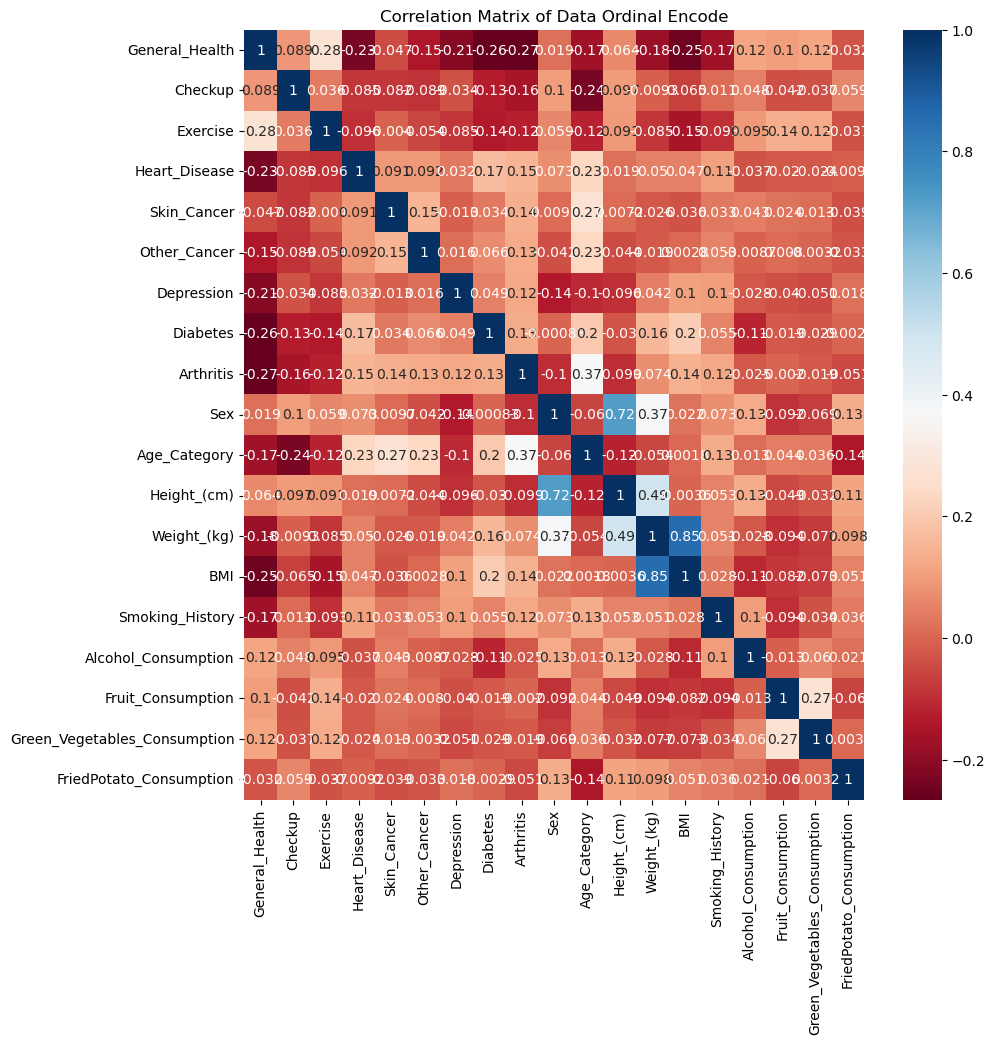

In [111]:
# Import matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data_ordinal_encode.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu")
plt.title("Correlation Matrix of Data Ordinal Encode")
plt.show()

In [112]:
data_ordinal_encode

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,10.0,0.000000,0.000000,0.000000,1.0,0.000000,0.250000,0.125000,0.093750
1,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,10.0,0.303030,0.333333,0.390663,0.0,0.000000,0.250000,0.000000,0.031250
2,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,8.0,0.242424,0.500000,0.645209,0.0,0.133333,0.100000,0.023438,0.125000
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0.0,1.0,11.0,0.757576,0.573339,0.412285,0.0,0.000000,0.250000,0.234375,0.062500
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,12.0,1.000000,0.500000,0.198034,1.0,0.000000,0.066667,0.031250,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.0,1.0,1.0,0.393939,0.400059,0.428010,0.0,0.133333,0.250000,0.062500,0.000000
308850,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1,0.0,1.0,9.0,0.757576,0.226631,0.056020,0.0,0.266667,0.125000,0.468750,0.031250
308851,3.0,4.0,1.0,0.0,0.0,0.0,1.0,1,0.0,0.0,2.0,0.060606,0.099941,0.213759,1.0,0.133333,0.333333,0.062500,0.031250
308852,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.0,1.0,9.0,0.848485,0.366696,0.166585,0.0,0.100000,0.250000,0.093750,0.000000


### SelectKBest Method for feature selection

In [113]:
# Import pandas and sklearn libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Separate the features (X) and the target (y)
X = data_ordinal_encode.drop("Heart_Disease", axis=1)
y = data_ordinal_encode["Heart_Disease"]

# Create a feature selector object
selector = SelectKBest(score_func=f_classif, k="all")

# Fit the selector to the data
selector.fit(X, y)

# Get the scores and p-values of each feature
scores = selector.scores_
pvalues = selector.pvalues_

# Create a dataframe of the feature names, scores, and p-values
feature_df = pd.DataFrame({"feature": X.columns, "score": scores, "p-value": pvalues})

# Sort the dataframe by score in descending order
feature_df = feature_df.sort_values(by="score", ascending=False)

# Print the dataframe
print(feature_df)

                         feature         score        p-value
0                 General_Health  17642.352807   0.000000e+00
9                   Age_Category  17092.766758   0.000000e+00
6                       Diabetes   9433.881563   0.000000e+00
7                      Arthritis   7489.831691   0.000000e+00
13               Smoking_History   3627.435019   0.000000e+00
2                       Exercise   2891.549432   0.000000e+00
4                   Other_Cancer   2657.117300   0.000000e+00
3                    Skin_Cancer   2568.860485   0.000000e+00
1                        Checkup   2242.836339   0.000000e+00
8                            Sex   1636.347832   0.000000e+00
11                   Weight_(kg)    763.225302  8.566549e-168
12                           BMI    684.504900  1.023910e-150
14           Alcohol_Consumption    414.490985   4.438285e-92
5                     Depression    326.364158   6.491542e-73
16  Green_Vegetables_Consumption    178.362099   1.133331e-40
15      

In [114]:
# Import pandas and sklearn libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Use 20% of the data
data_ordinal_encode = data_ordinal_encode.sample(frac=0.2, random_state=42)

# Separate the features (X) and the target (y)
X = data_ordinal_encode.drop("Heart_Disease", axis=1)
y = data_ordinal_encode["Heart_Disease"]

# Create a feature selector object
selector = SelectKBest(score_func=mutual_info_classif, k="all")

# Fit the selector to the data
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a dataframe of the feature names and scores
feature_df = pd.DataFrame({"feature": X.columns, "score": scores})

# Sort the dataframe by score in descending order
feature_df = feature_df.sort_values(by="score", ascending=False)

# Print the dataframe
print(feature_df)

                         feature     score
0                 General_Health  0.031094
9                   Age_Category  0.030754
2                       Exercise  0.016197
7                      Arthritis  0.016005
6                       Diabetes  0.012313
8                            Sex  0.012005
13               Smoking_History  0.011004
1                        Checkup  0.009361
4                   Other_Cancer  0.004068
14           Alcohol_Consumption  0.003681
5                     Depression  0.003471
11                   Weight_(kg)  0.003259
3                    Skin_Cancer  0.002647
12                           BMI  0.002470
15             Fruit_Consumption  0.002356
10                   Height_(cm)  0.001477
16  Green_Vegetables_Consumption  0.000456
17       FriedPotato_Consumption  0.000000


### Using cross validation to compare feature selection techinques

In [23]:
# Import pandas and sklearn libraries
import pandas as pd
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Use 20% of the data
data_ordinal_encode = data_ordinal_encode.sample(frac=0.2, random_state=42)

# Separate the features (X) and the target (y)
X = data_ordinal_encode.drop("Heart_Disease", axis=1)
y = data_ordinal_encode["Heart_Disease"]

# Define models using a pipeline
models = {
    "SelectFromModel_LogisticRegression": Pipeline([
        ('feature_selector', SelectFromModel(LogisticRegression(max_iter=1000))),
        ('classifier', LogisticRegression(max_iter=1000))  # Adjust max_iter as needed
    ]),
    "SelectFromModel_RandomForest": Pipeline([
        ('feature_selector', SelectFromModel(RandomForestClassifier())),
        ('classifier', RandomForestClassifier())
    ]),
    # Add a new model with SVM and linear kernel
    "SelectFromModel_SVM": Pipeline([
        ('feature_selector', SelectFromModel(SVC(kernel='linear'))),
        ('classifier', SVC(kernel='linear'))
    ])
}

# Define cross-validation settings
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Perform cross-validation and compare methods using parallelization
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    results[name] = scores

# Print the cross-validation results
for name, scores in results.items():
    print(f"{name}: Mean accuracy = {scores.mean():.4f}, Std deviation = {scores.std():.4f}")

SelectFromModel_LogisticRegression: Mean accuracy = 0.9183, Std deviation = 0.0028
SelectFromModel_RandomForest: Mean accuracy = 0.9119, Std deviation = 0.0052
SelectFromModel_SVM: Mean accuracy = 0.9158, Std deviation = 0.0048


In [47]:
data_ordinal_encode.shape

(308774, 19)

In [50]:
# Import pandas and sklearn libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2

# Separate the features (X) and the target (y)
X = data_ordinal_encode.drop("Heart_Disease", axis=1)
y = data_ordinal_encode["Heart_Disease"]

# Define feature selection methods
methods = {
    "SelectKBest_f_classif": SelectKBest(score_func=f_classif, k="all"),
    "SelectKBest_mutual_info_classif": SelectKBest(score_func=mutual_info_classif, k="all"),
    "SelectKBest_chi2": SelectKBest(score_func=chi2, k="all")
}

# Fit and transform each feature selection method
results = {}
for name, method in methods.items():
    X_new = method.fit_transform(X, y)
    scores = method.scores_
    pvalues = method.pvalues_
    results[name] = (X_new, scores, pvalues)

# Print the results for each feature selection method
for name, (X_new, scores, pvalues) in results.items():
    print(f"{name}:")
    print(f"Number of features selected: {X_new.shape[1]}")
    # Create a dataframe of the feature names, scores, and p-values
    feature_df = pd.DataFrame({"feature": X.columns, "score": scores, "p-value": pvalues})
    # Sort the dataframe by score in descending order
    feature_df = feature_df.sort_values(by="score", ascending=False)
    # Print the dataframe with proper formatting
    print(feature_df.to_markdown(index=False))

SelectKBest_f_classif:
Number of features selected: 18
| feature                      |      score |      p-value |
|:-----------------------------|-----------:|-------------:|
| General_Health               | 17642.4    | 0            |
| Age_Category                 | 17092.8    | 0            |
| Diabetes                     |  9433.88   | 0            |
| Arthritis                    |  7489.83   | 0            |
| Smoking_History              |  3627.44   | 0            |
| Exercise                     |  2891.55   | 0            |
| Other_Cancer                 |  2657.12   | 0            |
| Skin_Cancer                  |  2568.86   | 0            |
| Checkup                      |  2242.84   | 0            |
| Sex                          |  1636.35   | 0            |
| Weight_(kg)                  |   650.598  | 2.33403e-143 |
| BMI                          |   562.47   | 3.15403e-124 |
| Alcohol_Consumption          |   414.491  | 4.43828e-92  |
| Depression                  

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Separate the features (X) and the target (y)
X = data_ordinal_encode.drop("Heart_Disease", axis=1)  # Replace "Heart_Disease" with your target column name
y = data_ordinal_encode["Heart_Disease"]

# Define the feature selection method (CFS)
cfs_selector = SelectKBest(score_func=f_classif, k="all")

# Fit and transform the CFS method
X_new = cfs_selector.fit_transform(X, y)
scores = cfs_selector.scores_

# Create a dataframe of the feature names and scores
feature_df = pd.DataFrame({"feature": X.columns, "score": scores})

# Sort the dataframe by score in descending order
feature_df = feature_df.sort_values(by="score", ascending=False)

# Print the sorted dataframe
print("Feature Ranking (CFS):")
print(feature_df.to_markdown(index=False))

Feature Ranking (CFS):
| feature                      |      score |
|:-----------------------------|-----------:|
| General_Health               | 17642.4    |
| Age_Category                 | 17092.8    |
| Diabetes                     |  9433.88   |
| Arthritis                    |  7489.83   |
| Smoking_History              |  3627.44   |
| Exercise                     |  2891.55   |
| Other_Cancer                 |  2657.12   |
| Skin_Cancer                  |  2568.86   |
| Checkup                      |  2242.84   |
| Sex                          |  1636.35   |
| Weight_(kg)                  |   650.598  |
| BMI                          |   562.47   |
| Alcohol_Consumption          |   414.491  |
| Depression                   |   326.364  |
| Green_Vegetables_Consumption |   178.362  |
| Fruit_Consumption            |   124.114  |
| Height_(cm)                  |    76.9334 |
| FriedPotato_Consumption      |    26.4145 |
